In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import io

In [3]:
df_mobil = pd.read_csv('cars.csv')
X = df_mobil.iloc[:,[2,3,4]]
X= pd.get_dummies(X, prefix=['lug boot'], columns=['lug boot'])
y= df_mobil['safety']

print ("Label kelas: ", np.unique(y))

Label kelas:  ['high' 'low' 'med']


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

print(X[0:5,:])

[[-1.34164079 -1.33630621 -0.70710678 -0.70710678  1.41421356]
 [-1.34164079 -1.33630621 -0.70710678 -0.70710678  1.41421356]
 [-1.34164079 -1.33630621 -0.70710678 -0.70710678  1.41421356]
 [-1.34164079 -1.33630621 -0.70710678  1.41421356 -0.70710678]
 [-1.34164079 -1.33630621 -0.70710678  1.41421356 -0.70710678]]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-0.4472136   0.26726124 -0.70710678  1.41421356 -0.70710678]
 [-1.34164079  1.06904497  1.41421356 -0.70710678 -0.70710678]
 [-0.4472136   1.06904497 -0.70710678 -0.70710678  1.41421356]
 [-1.34164079  0.26726124 -0.70710678  1.41421356 -0.70710678]
 [-0.4472136   1.06904497 -0.70710678 -0.70710678  1.41421356]]
y Training: 580      med
1214    high
1665     low
661      med
587     high
Name: safety, dtype: object


In [6]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='linear', C=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=0)

In [7]:
print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Koefisien model :  [[ 4.61648717e-07 -2.41896974e-08  3.14192427e-01  3.14178604e-01
  -6.28371031e-01]
 [-1.64993370e-05 -3.44347723e-05  3.14337027e-01  3.14134904e-01
  -6.28471931e-01]
 [-9.30132206e-05 -1.76249160e-04  3.14250975e-01  3.14292496e-01
  -6.28543471e-01]]
Bias model :  [0.33334565 0.33329357 0.33329915]
Indeks Support Vector :  [   1    4    7 ... 1204 1205 1207]
Support vector :  [[-1.34164079  1.06904497  1.41421356 -0.70710678 -0.70710678]
 [-0.4472136   1.06904497 -0.70710678 -0.70710678  1.41421356]
 [ 1.34164079  1.06904497  1.41421356 -0.70710678 -0.70710678]
 ...
 [ 0.4472136   1.06904497  1.41421356 -0.70710678 -0.70710678]
 [-0.4472136  -1.33630621 -0.70710678 -0.70710678  1.41421356]
 [-1.34164079  1.06904497 -0.70710678 -0.70710678  1.41421356]]
Jumlah support vector:  [403 411 392]
Nilai alpha :  [[1. 1. 1. ... 1. 1. 0.]
 [1. 1. 1. ... 1. 1. 1.]]


In [8]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['high' 'high' 'med' 'high' 'high' 'high' 'med' 'high' 'high' 'high'
 'high' 'med' 'high' 'med' 'high' 'high' 'med' 'high' 'high' 'med' 'high'
 'high' 'high' 'high' 'high' 'med' 'high' 'med' 'high' 'med' 'high' 'med'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'med' 'high'
 'high' 'high' 'high' 'med' 'med' 'high' 'high' 'high' 'high' 'high' 'med'
 'high' 'high' 'high' 'high' 'high' 'med' 'high' 'med' 'high' 'high'
 'high' 'high' 'med' 'high' 'high' 'high' 'med' 'high' 'high' 'high' 'med'
 'high' 'high' 'med' 'med' 'high' 'high' 'high' 'high' 'high' 'med' 'med'
 'high' 'med' 'high' 'med' 'high' 'high' 'high' 'high' 'med' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'med' 'high' 'high' 'high'
 'high' 'high' 'high' 'med' 'high' 'med' 'med' 'high' 'med' 'high' 'high'
 'med' 'high' 'med' 'high' 'high' 'high' 'high' 'med' 'high' 'high' 'high'
 'high' 'high' 'high' 'med' 'high' 'high' 'high' 'high' 'high' 'med' 'med'
 'med' 'high' 'high' 'high' 'med' 'high' 'med' 'hig

Akurasi : 30.2504816955684 %


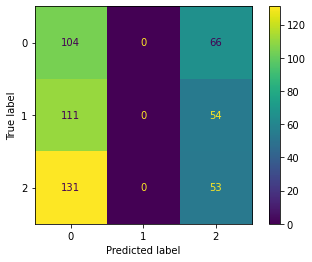

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))